## Keas - Learning flight patterns
I want to learn more about keas

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 

import pandas as pd
import requests
import json
import ast
import pandas_profiling

In [145]:
def get_keas(url = "https://data.keadatabase.nz/sightings/birds/?format=json"):
    response = requests.get(url).json()
    
    if response['results']:
        keas = pd.DataFrame(response['results'])
    else:
        print('no data')
    
    if response['next']:
        keas = pd.concat([keas,  get_keas(response['next'])], ignore_index=True,sort=False)
         
    return keas    

## Get sightings from API 
Run below if you need to scrape Keas DB

In [146]:
# keas = get_keas()
# keas.to_csv('kea-sightings.csv')

## Read from CSV
If you've already scraped the data. Use the CSV to save time

In [147]:
keas = pd.read_csv('kea-sightings.csv')
keas.head()

,Unnamed: 0,band_combo,banded,bird,get_banded_display,get_life_stage_guess_display,get_sex_guess_display,id,life_stage_guess,revisit,sex_guess,sighting,sighting__date_sighted,sighting__point_location,sighting__time_sighted
0,0,NaN,unbanded,NaN,Not banded,NaN,NaN,8578,NaN,False,NaN,4096,2019-09-22,"{'type': 'Point', 'coordinates': [170.07434033...",11:15:00
1,1,White 5 on red band,readable,NaN,"Banded, readable",NaN,NaN,8573,NaN,False,NaN,4093,2019-09-21,"{'type': 'Point', 'coordinates': [171.55994506...",12:44:00
2,2,White 5 on red,readable,NaN,"Banded, readable",NaN,NaN,8577,NaN,False,NaN,4095,2019-09-21,"{'type': 'Point', 'coordinates': [171.55961150...",12:30:00
3,3,Red band white letter A,readable,NaN,"Banded, readable",NaN,NaN,8580,NaN,False,NaN,4098,2019-09-21,"{'type': 'Point', 'coordinates': [171.71746175...",11:00:00
4,4,Black 2 on Yellow,readable,NaN,"Banded, readable",Adult,Male,8579,adult,False,male,4097,2019-09-20,"{'type': 'Point', 'coordinates': [171.53284526...",11:30:00


## Convert location list into a latitude & longitude columns
It's currently nested as a json object. So need to get the lat  & long abnd create a new column

In [148]:
load = keas['sighting__point_location'].apply(ast.literal_eval)
location = pd.read_json(json.dumps(list(load)))

keas['latitude'] = location.apply(lambda x : x['coordinates'][0],axis=1)
keas['longitude'] = location.apply(lambda x : x['coordinates'][1],axis=1)

## Let's get name and status
We also need to use the same method above to grab a few extra fields related to the bird.

In [149]:
load = keas['bird']
load = load.fillna('{}').apply(ast.literal_eval)
bird = pd.read_json(json.dumps(list(load)))
bird.drop(columns=['band_combo'], inplace = True)

keas = keas.join(bird)
keas.head()

,Unnamed: 0,band_combo,banded,bird,get_banded_display,get_life_stage_guess_display,get_sex_guess_display,id,life_stage_guess,revisit,...,date_imported,date_modified,get_age,get_life_stage,name,primary_band,sex,slug,status,study_area
0,0,NaN,unbanded,NaN,Not banded,NaN,NaN,8578,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,White 5 on red band,readable,NaN,"Banded, readable",NaN,NaN,8573,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,White 5 on red,readable,NaN,"Banded, readable",NaN,NaN,8577,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Red band white letter A,readable,NaN,"Banded, readable",NaN,NaN,8580,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Black 2 on Yellow,readable,NaN,"Banded, readable",Adult,Male,8579,adult,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
print(keas.shape)
print(keas.columns)
print(keas.dtypes)

(8457, 29)
Index(['Unnamed: 0', 'band_combo', 'banded', 'bird', 'get_banded_display',
       'get_life_stage_guess_display', 'get_sex_guess_display', 'id',
       'life_stage_guess', 'revisit', 'sex_guess', 'sighting',
       'sighting__date_sighted', 'sighting__point_location',
       'sighting__time_sighted', 'latitude', 'longitude', 'bird_extended',
       'birthday', 'date_imported', 'date_modified', 'get_age',
       'get_life_stage', 'name', 'primary_band', 'sex', 'slug', 'status',
       'study_area'],
      dtype='object')
Unnamed: 0                        int64
band_combo                       object
banded                           object
bird                             object
get_banded_display               object
get_life_stage_guess_display     object
get_sex_guess_display            object
id                                int64
life_stage_guess                 object
revisit                            bool
sex_guess                        object
sighting               

In [151]:
columns = [
    'name', 
    'sex',
    'get_age',
    'get_life_stage', 
    'primary_band', 
    'status',
    'study_area'
    'band_combo', 
    'banded', 
    'get_banded_display',
    'get_life_stage_guess_display', 
    'get_sex_guess_display', 
    'life_stage_guess', 
    'revisit', 
    'sex_guess', 'sighting',
    'sighting__date_sighted', 
    'sighting__time_sighted', 
    'latitude', 'longitude', 
    'bird_extended',
    'birthday', 
    'date_imported', 
    'date_modified'
]
clean_keas = keas.loc[:,columns]
clean_keas.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,sex,get_age,get_life_stage,primary_band,status,study_areaband_combo,banded,get_banded_display,get_life_stage_guess_display,...,sex_guess,sighting,sighting__date_sighted,sighting__time_sighted,latitude,longitude,bird_extended,birthday,date_imported,date_modified
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unbanded,Not banded,NaN,...,NaN,4096,2019-09-22,11:15:00,170.074340,-43.712961,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,readable,"Banded, readable",NaN,...,NaN,4093,2019-09-21,12:44:00,171.559945,-42.907490,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,readable,"Banded, readable",NaN,...,NaN,4095,2019-09-21,12:30:00,171.559612,-42.908572,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,readable,"Banded, readable",NaN,...,NaN,4098,2019-09-21,11:00:00,171.717462,-42.969757,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,readable,"Banded, readable",Adult,...,male,4097,2019-09-20,11:30:00,171.532845,-42.920960,NaN,NaN,NaN,NaN


## Lets find out the birdies names
Woo. Lets find out thesre kea's names!

In [152]:
clean_keas.name.value_counts()

Tuhura               182
Ken Joe              126
Jesse                 81
Kauri                 74
Schist                60
Hohoro                57
Ya se                 56
Zulia                 56
Hipi Pukepuke         52
Maungatere            49
Joan                  46
Wananga               42
Captain Sanderson     42
Sherlock              30
Wade                  30
Romeo                 30
Captain Beaver        30
Kala                  30
Chaos                 28
Whizz                 28
Lancelot              27
Paul                  25
Aunty Bell            25
Spark                 24
Huff Tuft             21
Jack                  20
Valerie               20
Wooldoor              19
Kerewa                19
Toot                  18
                    ... 
Arnie                  1
Neddy                  1
Comet                  1
Gonzalez               1
Lacy                   1
Nyx                    1
Samson                 1
Greenie                1
Angelina               1


## Lets clean up the dates. 
These might come in handy in future

In [153]:
import re
clean_keas['sighting__date_sighted']= pd.to_datetime(clean_keas['sighting__date_sighted']) 

clean_keas['sighting__time_sighted_z'] = clean_keas['sighting__time_sighted'].apply(lambda x : (float(re.sub(':','', x))) / 100 )
clean_keas['sighting__time_sighted_z']

0       1115.0
1       1244.0
2       1230.0
3       1100.0
4       1130.0
5        929.0
6        929.0
7        929.0
8        929.0
9        929.0
10       809.0
11       715.0
12       715.0
13       715.0
14      2031.0
15      2000.0
16      2000.0
17       956.0
18       825.0
19       825.0
20       825.0
21       500.0
22      1915.0
23      1915.0
24      1915.0
25      1830.0
26      1830.0
27       930.0
28       930.0
29       930.0
         ...  
8427    1200.0
8428    1200.0
8429    1200.0
8430    1200.0
8431    1200.0
8432    1200.0
8433    1200.0
8434    1200.0
8435    1200.0
8436    1200.0
8437    1200.0
8438    1200.0
8439    1200.0
8440    1200.0
8441    1200.0
8442    1200.0
8443    1200.0
8444    1200.0
8445    1200.0
8446    1200.0
8447    1200.0
8448    1200.0
8449    1200.0
8450    1200.0
8451    1200.0
8452    1200.0
8453    1200.0
8454    1200.0
8455    1200.0
8456    1200.0
Name: sighting__time_sighted_z, Length: 8457, dtype: float64

## Get individual birds
Make a handy function to grab rows related to a bird

In [154]:
def get_bird_by_name(name):
    return clean_keas[clean_keas['name'] == name]

jesse =  get_bird_by_name('Jesse')
kauri = get_bird_by_name('Kauri')
jesse.shape

(81, 24)

## Lets plot these birds!

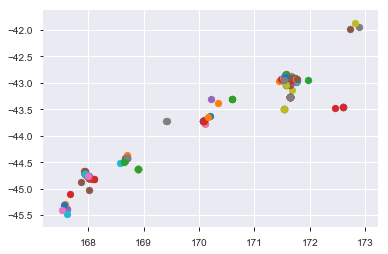

In [155]:
for name, count in clean_keas.name.value_counts().iteritems():
        bird = get_bird_by_name(name)
        plt.scatter(x=bird['latitude'], y=bird['longitude'])

In [156]:
print(jesse['latitude'].head())
print(jesse['longitude'].head())

76      171.560152
547     171.556338
2609    171.560604
2852    171.556249
2970    171.561039
Name: latitude, dtype: float64
76     -42.936842
547    -42.888306
2609   -42.906232
2852   -42.888128
2970   -42.939112
Name: longitude, dtype: float64


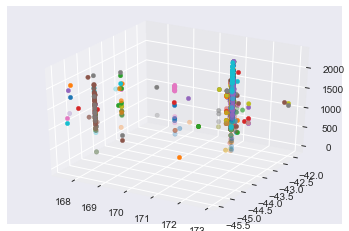

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name, count in clean_keas.name.value_counts().iteritems():
    bird = get_bird_by_name(name)
    ax.scatter(bird['latitude'], bird['longitude'], bird['sighting__time_sighted_z'])

In [121]:
clean_keas['sighting__time_sighted_z'].describe()

count    8457.000000
mean     1308.868630
std       425.439936
min         0.000000
25%      1000.000000
50%      1300.000000
75%      1649.000000
max      2357.000000
Name: sighting__time_sighted_z, dtype: float64

In [124]:
print(clean_keas['latitude'].mean())
print(clean_keas['longitude'].mean())

170.43617286515376
-43.27833433900556


In [137]:
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

g_bird = get_bird_by_name('Tuhura')

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [166]:
from mpl_toolkits.basemap import Basemap
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'